<a href="https://colab.research.google.com/github/coddingyun/pytorch/blob/main/Bookstudy_ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 합성곱과 풀링 (Convolution and Pooling)

###1. 합성곱 신경망의 대두

- 다층 퍼셉트론은 몇 가지 픽셀만 값이 다라져도 민감하게 예측에 영향을 받는다는 단점이 있음

- 1차원으로 변환된 결과는 공간적인 구조 정보가 유실된 상태임

- 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요

###2. 채널

- 이미니즌 3차원 텐서 (높이, 너비, 채널)
- 채널: 색의 성분
- 채널=깊이

###3. 합성곱 연산
- 합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할

- 커널,필터라는 nxm크기의 행렬로 높이 x 너비 크기의 이미지를 끝가지 겹치며 훑으면서 nxm크기의 겹쳐지는 부분의 각이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력으로 하는 것

- 특성 맵, feature map: 입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과

- stride: 커널의 이동 범위

###4. 패딩

- 특정 맵은 입력보다 크기가 작아지는데 동일하게 유지되고 싶다면 패딩을 사용

- 패딩: 합성곱 연산을 하기 전에 입력의 가장자리에 지정된 개수의 폭만큼 행과 열 추가

- zero padding: 0을 추가


###5. 가중치와 편향

+ 합성곱 신경망의 가중치
  - 다층 퍼셉트론
![image.png](https://wikidocs.net/images/page/64066/conv11.png)
  36개의 가중치

  - 합성곱 신경망
  ![image.png](https://wikidocs.net/images/page/64066/conv13.png)
  4개의 가중치

+ 합성곱 신경망의 편향
  - 편향을 사용한다면 커널을 적용한 뒤 더해짐
  - 편향은 하나의 값만 존재, 커널이 적용된 결과의 모든 원소에 더해짐

###6. 특성 맵의 크기 계산 방법

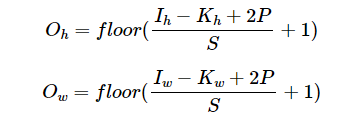

floor: 소수점 이하를 버리는 역할

P: padding

I: input

K: kernel

O: feature map

h: height

w: width

###7. 다수의 채널을 가질 경우의 합성곱 연산

- 입력 데이터의 채널 수와 커널의 채널 수는 같아야 함

  ![image.png](https://wikidocs.net/images/page/64066/conv15.png)
  + 3개의 채널을 가진 1개의 커널




###8. 3차원 텐서의 합성곱 연산
![image.png](https://wikidocs.net/images/page/64066/conv16_final.png)

![image.png](https://wikidocs.net/images/page/64066/conv17_final_final.PNG)

- 다수의 커널을 사용할 시, 사용한 커널 수는 합성곱 연산의 결과로 나오는 특성맵 채널수

- 가중치 매개변수의 총 수: $$K_i \times K_o \times C_i \times C_o$$

###9. 풀링
- 일반적으로 합성곱층(합성곱 연산 + 활성화 함수) 다음에는 풀링층 추가

- 풀링층에서는 특성 맵을 다운샘플링하여 특성맵의 크기를 줄임

- 최대 풀링 max pooling: 커널과 겹치는 영역 안에서 최대값 추출, 특성맵이 절반의 크기로 다운 샘플링

- 평균 풀링 average pooling: 평균값 추출

- 커널과 스트라이드 개념 존재하지만 가중치가 없어 연산 후 채널 수가 변하지 않음.

- 풀링을 사용하면, 특성 맵의 크기가 줄어드므로 특성 맵의 가중치의 개수를 줄여줌

#2. CNN으로 MNIST 분류하기

###1. 모델 이해하기

1. 합성곱+활성화 함수= 합성곱층
2. 합성곱+활성화 함수+맥스풀링= 합성곱층

- 1번 레이어 : 합성곱층(Convolutional layer)

  합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU

  맥스풀링(kernel_size=2, stride=2))

- 2번 레이어 : 합성곱층(Convolutional layer)

  합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU

  맥스풀링(kernel_size=2, stride=2))

- 3번 레이어 : 전결합층(Fully-Connected layer)

  특성맵을 펼친다. # batch_size × 7 × 7 × 64 → batch_size × 3136

  전결합층(뉴런 10개) + 활성화 함수 Softmax

###2. 모델 구현하기

In [ ]:
import torch
import torch.nn as nn

inputs = torch.Tensor(1,1,28,28)
print('텐서의 크기: {}'.format(inputs.shape))

텐서의 크기: torch.Size([1, 1, 28, 28])


In [ ]:
conv1 = nn.Conv2d(1,32,3,padding=1)
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
pool = nn.MaxPool2d(2)
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [ ]:
out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [ ]:
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [ ]:
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [ ]:
out = pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [ ]:
out.size(0) #0번째 차원 접근

1

In [ ]:
out.size(1)

64

In [ ]:
out.size(2)

7

In [ ]:
out.size(3)

7

In [ ]:
# 첫번째 차원인 배치 차원은 그대로 두고 나머지는 펼쳐라
out = out.view(out.size(0), -1) 
print(out.shape)

torch.Size([1, 3136])


In [ ]:
fc = nn.Linear(3136, 10) # input_dim = 3,136, output_dim = 10
out = fc(out)
print(out.shape)

torch.Size([1, 10])


###3. CNN으로 MNIST 분류하기

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

In [ ]:
model = CNN().to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.225658983
[Epoch:    2] cost = 0.0629897192
[Epoch:    3] cost = 0.046263855
[Epoch:    4] cost = 0.0374744497
[Epoch:    5] cost = 0.0315009803
[Epoch:    6] cost = 0.0260562431
[Epoch:    7] cost = 0.0217889287
[Epoch:    8] cost = 0.0184159651
[Epoch:    9] cost = 0.0162835792
[Epoch:   10] cost = 0.0133258477
[Epoch:   11] cost = 0.0100290906
[Epoch:   12] cost = 0.00988505036
[Epoch:   13] cost = 0.00857405178
[Epoch:   14] cost = 0.00615035789
[Epoch:   15] cost = 0.00720831985


In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9858999848365784
